In [1]:
# 현재 파일 경로 확인
%pwd

'/Users/jahyeon_gu/AI_School/TP2/Day5'

In [2]:
# 라이브러리 설치
# !pip install -U finance-datareader

In [3]:
# 라이브러리 로드
import pandas as pd
import numpy as np

In [4]:
import FinanceDataReader as fdr

fdr.__version__

'0.9.42'

# 상장종목 목록

In [5]:
url = "http://finance.naver.com/sise/entryJongmok.naver?page=1"
print(url)

http://finance.naver.com/sise/entryJongmok.naver?page=1


In [6]:
pd.read_html(url)

[         종목별       현재가      전일비     등락률         거래량   거래대금(백만)    시가총액(억)
 0        NaN       NaN      NaN     NaN         NaN        NaN        NaN
 1       삼성전자   55800.0    600.0  +1.09%  19120111.0  1075287.0  3331139.0
 2   LG에너지솔루션  470000.0  25500.0  +5.74%    451159.0   208189.0  1099800.0
 3     SK하이닉스   89800.0   3600.0  +4.18%   5008078.0   446810.0   653746.0
 4   삼성바이오로직스  814000.0   3000.0  +0.37%     32409.0    26301.0   579356.0
 5       LG화학  560000.0   5000.0  +0.90%    199942.0   111986.0   395317.0
 6      삼성SDI  570000.0  14000.0  +2.52%    235302.0   133918.0   391958.0
 7        현대차  176500.0   3000.0  -1.67%   1035745.0   182742.0   377124.0
 8         기아   70800.0   2000.0  -2.75%   1895174.0   133939.0   286997.0
 9      NAVER  166000.0  10500.0  -5.95%   5519128.0   932659.0   272321.0
 10       카카오   54900.0   1000.0  -1.79%   1825264.0   101140.0   244476.0
 11       NaN       NaN      NaN     NaN         NaN        NaN        NaN
 12       NaN       NaN  

In [7]:
df_top10 = pd.read_html(url)[0].dropna()
df_top10

,종목별,현재가,전일비,등락률,거래량,거래대금(백만),시가총액(억)
1,삼성전자,55800.0,600.0,+1.09%,19120111.0,1075287.0,3331139.0
2,LG에너지솔루션,470000.0,25500.0,+5.74%,451159.0,208189.0,1099800.0
3,SK하이닉스,89800.0,3600.0,+4.18%,5008078.0,446810.0,653746.0
4,삼성바이오로직스,814000.0,3000.0,+0.37%,32409.0,26301.0,579356.0
5,LG화학,560000.0,5000.0,+0.90%,199942.0,111986.0,395317.0
6,삼성SDI,570000.0,14000.0,+2.52%,235302.0,133918.0,391958.0
7,현대차,176500.0,3000.0,-1.67%,1035745.0,182742.0,377124.0
8,기아,70800.0,2000.0,-2.75%,1895174.0,133939.0,286997.0
9,NAVER,166000.0,10500.0,-5.95%,5519128.0,932659.0,272321.0
10,카카오,54900.0,1000.0,-1.79%,1825264.0,101140.0,244476.0


# 전체 상장 종목에서 종목코드와 종목명 가져오기

In [8]:
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [9]:
df_krx = df_krx[["Name", "Symbol"]]
df_krx.head()

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520


# 상위 10개 종목과 Merge
* df_top10에 종목코드 추가

In [10]:
# 컬럼 이름이 다르므로 on="" 을 쓸 수 없음
df_top10.merge(df_krx, left_on="종목별", right_on="Name", how="left")

,종목별,현재가,전일비,등락률,거래량,거래대금(백만),시가총액(억),Name,Symbol
0,삼성전자,55800.0,600.0,+1.09%,19120111.0,1075287.0,3331139.0,삼성전자,005930
1,LG에너지솔루션,470000.0,25500.0,+5.74%,451159.0,208189.0,1099800.0,LG에너지솔루션,373220
2,SK하이닉스,89800.0,3600.0,+4.18%,5008078.0,446810.0,653746.0,SK하이닉스,000660
3,삼성바이오로직스,814000.0,3000.0,+0.37%,32409.0,26301.0,579356.0,삼성바이오로직스,207940
4,LG화학,560000.0,5000.0,+0.90%,199942.0,111986.0,395317.0,LG화학,051910
5,삼성SDI,570000.0,14000.0,+2.52%,235302.0,133918.0,391958.0,삼성SDI,006400
6,현대차,176500.0,3000.0,-1.67%,1035745.0,182742.0,377124.0,현대차,005380
7,기아,70800.0,2000.0,-2.75%,1895174.0,133939.0,286997.0,기아,000270
8,NAVER,166000.0,10500.0,-5.95%,5519128.0,932659.0,272321.0,NAVER,035420
9,카카오,54900.0,1000.0,-1.79%,1825264.0,101140.0,244476.0,카카오,035720


In [11]:
df_10 = df_top10.merge(df_krx, left_on="종목별", right_on="Name", how="left")[["Name", "Symbol"]]
df_10

,Name,Symbol
0,삼성전자,005930
1,LG에너지솔루션,373220
2,SK하이닉스,000660
3,삼성바이오로직스,207940
4,LG화학,051910
5,삼성SDI,006400
6,현대차,005380
7,기아,000270
8,NAVER,035420
9,카카오,035720


In [12]:
# 삼성바이오로직스 2022년 일별 시세
fdr.DataReader("207940", "2022")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,892431,909232,891443,900338,46588,0.008859
2022-01-04,891443,900338,874642,877607,71942,-0.025247
2022-01-05,870689,871677,843016,850923,97965,-0.030405
2022-01-06,850923,855864,825227,828192,82993,-0.026713
2022-01-07,828192,840052,828192,834122,73039,0.007160
...,...,...,...,...,...,...
2022-09-28,747000,770000,745000,767000,92653,0.017241
2022-09-29,790000,825000,789000,813000,179902,0.059974
2022-09-30,814000,826000,804000,807000,75555,-0.007380


In [13]:
# 삼성바이오로직스 2022년 일별 시세 종가만 가져오기
fdr.DataReader("207940", "2022")["Close"]

Date
2022-01-03    900338
2022-01-04    877607
2022-01-05    850923
2022-01-06    828192
2022-01-07    834122
               ...  
2022-09-28    767000
2022-09-29    813000
2022-09-30    807000
2022-10-04    811000
2022-10-05    814000
Name: Close, Length: 186, dtype: int64

# 여러 종목의 종가 수집

In [14]:
for sym in df_10["Symbol"]:
    print(sym)

005930
373220
000660
207940
051910
006400
005380
000270
035420
035720


In [15]:
item_list = [fdr.DataReader(sym, "2022")["Close"] for sym in df_10["Symbol"]]
item_list

[Date
 2022-01-03    78600
 2022-01-04    78700
 2022-01-05    77400
 2022-01-06    76900
 2022-01-07    78300
               ...  
 2022-09-28    52900
 2022-09-29    52600
 2022-09-30    53100
 2022-10-04    55200
 2022-10-05    55800
 Name: Close, Length: 186, dtype: int64,
 Date
 2022-01-27    505000
 2022-01-28    450000
 2022-02-03    477000
 2022-02-04    504000
 2022-02-07    548000
                ...  
 2022-09-28    433500
 2022-09-29    440000
 2022-09-30    426500
 2022-10-04    444500
 2022-10-05    470000
 Name: Close, Length: 168, dtype: int64,
 Date
 2022-01-03    128500
 2022-01-04    128500
 2022-01-05    125500
 2022-01-06    125000
 2022-01-07    127000
                ...  
 2022-09-28     81200
 2022-09-29     80800
 2022-09-30     83100
 2022-10-04     86200
 2022-10-05     89800
 Name: Close, Length: 186, dtype: int64,
 Date
 2022-01-03    900338
 2022-01-04    877607
 2022-01-05    850923
 2022-01-06    828192
 2022-01-07    834122
                ...  
 2022-

# index 값이 같기 때문에 옆으로 합쳐준다

In [16]:
df = pd.concat(item_list, axis=1)
df

,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,
2022-01-03,78600,NaN,128500,900338,618000,650000,210500,82600,376000,114500
2022-01-04,78700,NaN,128500,877607,644000,649000,210000,83500,365500,111500
2022-01-05,77400,NaN,125500,850923,664000,648000,213500,85900,355000,105500
2022-01-06,76900,NaN,125000,828192,690000,642000,214000,85600,338500,100000
2022-01-07,78300,NaN,127000,834122,719000,636000,215000,86700,338000,100000
...,...,...,...,...,...,...,...,...,...,...
2022-09-28,52900,433500.0,81200,767000,546000,564000,179500,73900,200500,56900
2022-09-29,52600,440000.0,80800,813000,547000,566000,181500,74500,196500,55900
2022-09-30,53100,426500.0,83100,807000,536000,546000,176500,71900,193500,57100


In [17]:
df.columns = df_10["Name"]
df

Name,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,삼성SDI,현대차,기아,NAVER,카카오
Date,,,,,,,,,,
2022-01-03,78600,NaN,128500,900338,618000,650000,210500,82600,376000,114500
2022-01-04,78700,NaN,128500,877607,644000,649000,210000,83500,365500,111500
2022-01-05,77400,NaN,125500,850923,664000,648000,213500,85900,355000,105500
2022-01-06,76900,NaN,125000,828192,690000,642000,214000,85600,338500,100000
2022-01-07,78300,NaN,127000,834122,719000,636000,215000,86700,338000,100000
...,...,...,...,...,...,...,...,...,...,...
2022-09-28,52900,433500.0,81200,767000,546000,564000,179500,73900,200500,56900
2022-09-29,52600,440000.0,80800,813000,547000,566000,181500,74500,196500,55900
2022-09-30,53100,426500.0,83100,807000,536000,546000,176500,71900,193500,57100


# 시각화를 위한 폰트 설정

In [18]:
# 한글 폰트 
# !pip install koreanize-matplotlib

In [19]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = "retina"

In [20]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:title={'center':'한글'}>

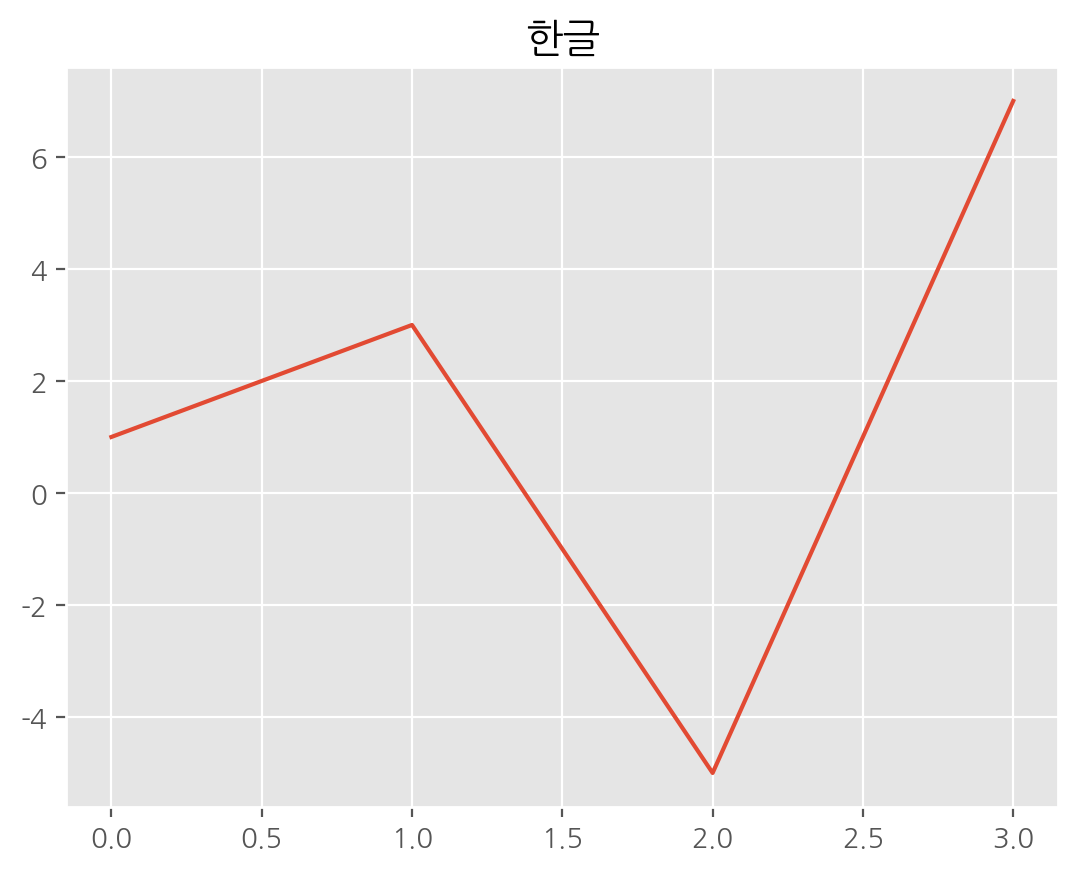

In [21]:
# 한글 폰트 확인
plt.style.use("ggplot")
pd.Series([1, 3, -5, 7]).plot(title='한글')

# 여러 종목 한번에 시각화

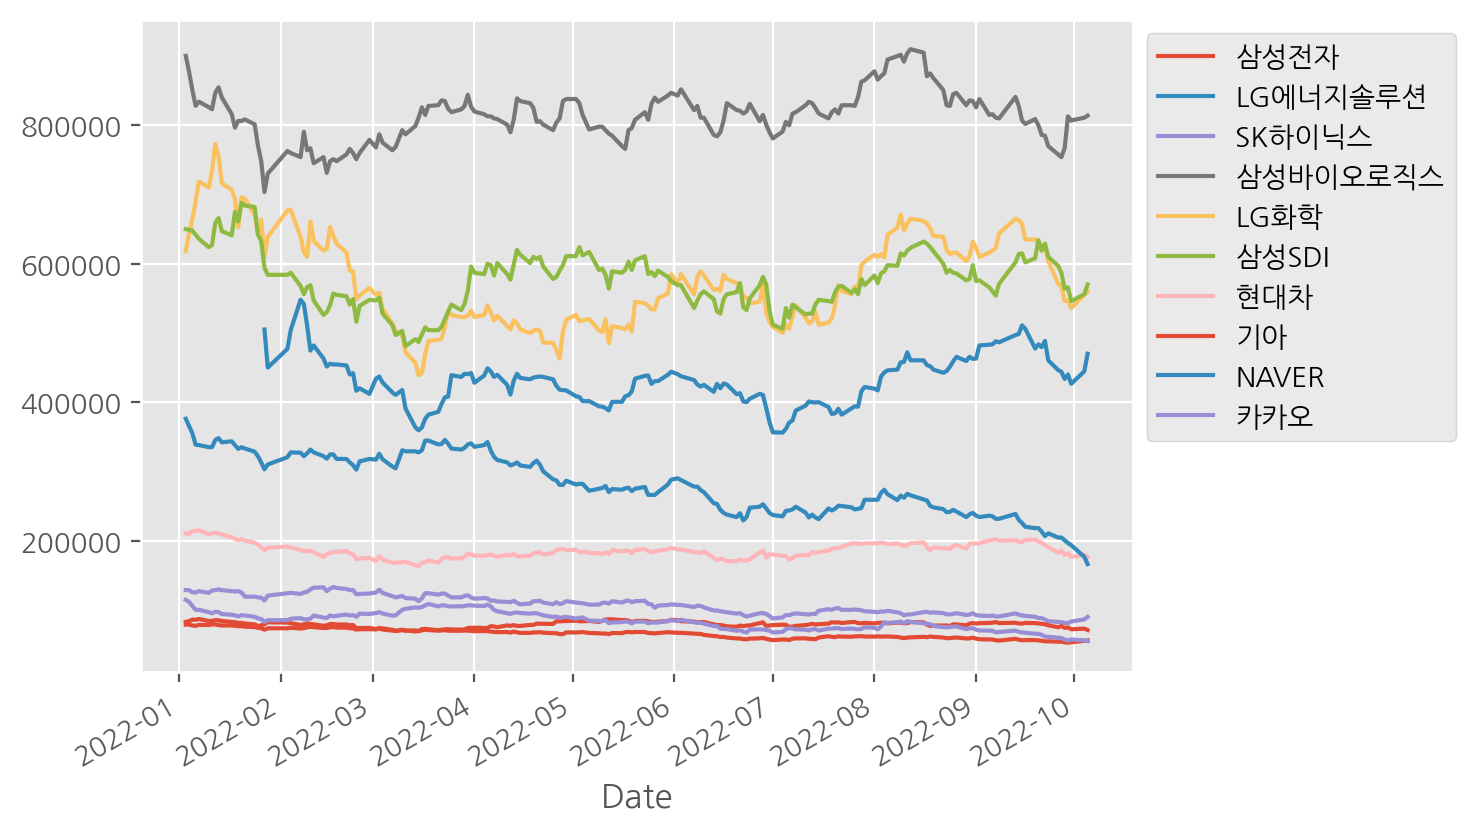

In [22]:
df.plot()
# 범례를 그래프로 바깥에 빼는 코드, 자세한건 도움말
plt.legend(bbox_to_anchor=(1, 1))

<AxesSubplot:xlabel='Date'>

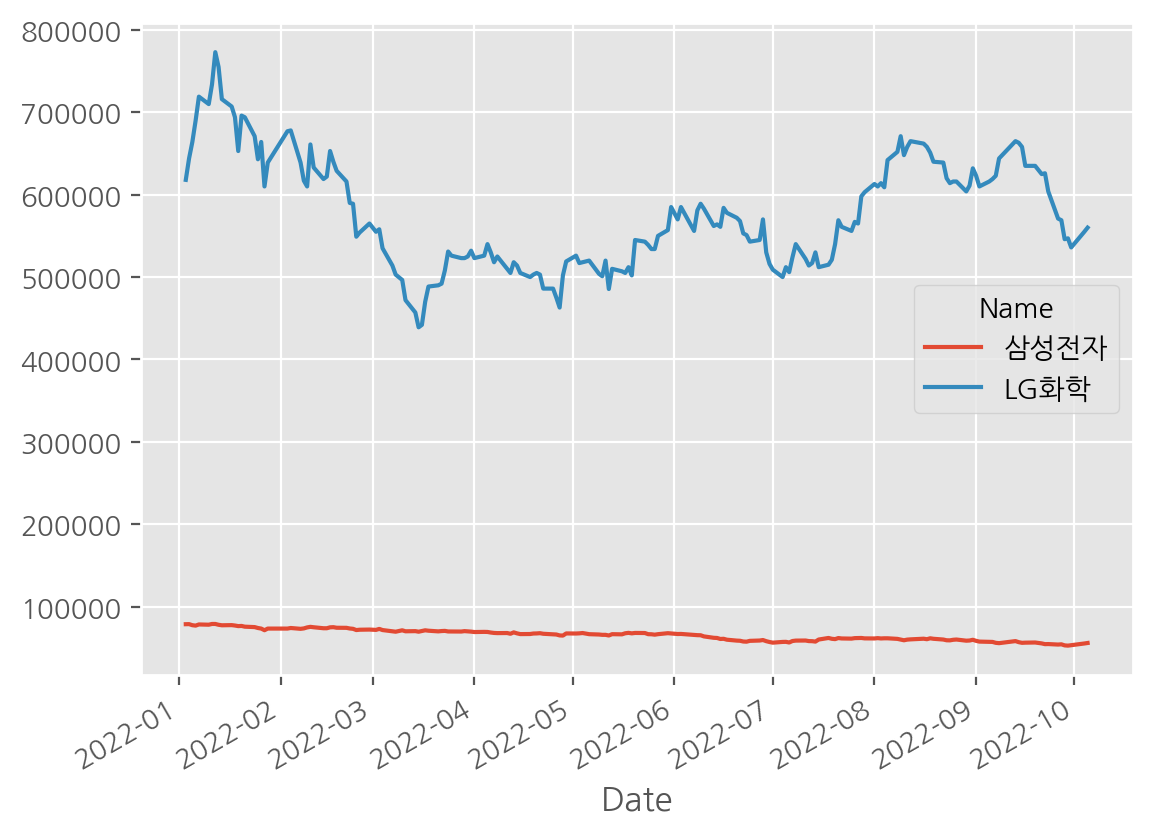

In [23]:
# 2개 종목 비교
df[["삼성전자", "LG화학"]].plot()

<AxesSubplot:xlabel='Date'>

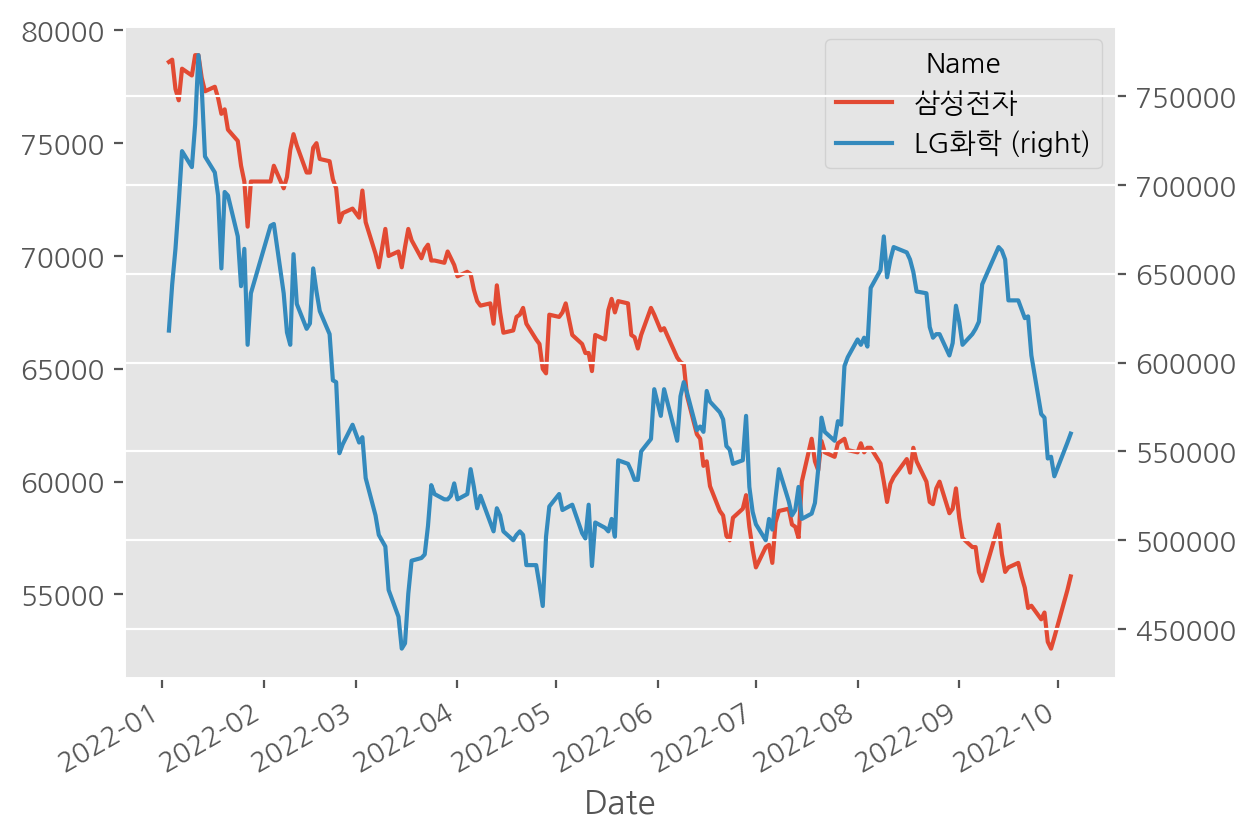

In [24]:
# y축 때문에 비교하기가 어려움
# y축을 분리
df[["삼성전자", "LG화학"]].plot(secondary_y="LG화학")

# 전체 데이터프레임 값에 대한 수익률 계산

In [25]:
# 첫날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률
df_norm = df / df.iloc[0] - 1
df_norm

Name,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,삼성SDI,현대차,기아,NAVER,카카오
Date,,,,,,,,,,
2022-01-03,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-04,0.001272,NaN,0.000000,-0.025247,0.042071,-0.001538,-0.002375,0.010896,-0.027926,-0.026201
2022-01-05,-0.015267,NaN,-0.023346,-0.054885,0.074434,-0.003077,0.014252,0.039952,-0.055851,-0.078603
2022-01-06,-0.021628,NaN,-0.027237,-0.080132,0.116505,-0.012308,0.016627,0.036320,-0.099734,-0.126638
2022-01-07,-0.003817,NaN,-0.011673,-0.073546,0.163430,-0.021538,0.021378,0.049637,-0.101064,-0.126638
...,...,...,...,...,...,...,...,...,...,...
2022-09-28,-0.326972,NaN,-0.368093,-0.148098,-0.116505,-0.132308,-0.147268,-0.105327,-0.466755,-0.503057
2022-09-29,-0.330789,NaN,-0.371206,-0.097006,-0.114887,-0.129231,-0.137767,-0.098063,-0.477394,-0.511790
2022-09-30,-0.324427,NaN,-0.353307,-0.103670,-0.132686,-0.160000,-0.161520,-0.129540,-0.485372,-0.501310


# LG에너지솔루션 전처리

In [26]:
# 영운님 코드
# lgES = (df["LG에너지솔루션"].dropna() / df["LG에너지솔루션"].dropna()[0]) - 1
# df_norm["LG에너지솔루션"] = lgES

In [27]:
condition = df["LG에너지솔루션"].notnull()
condition

Date
2022-01-03    False
2022-01-04    False
2022-01-05    False
2022-01-06    False
2022-01-07    False
              ...  
2022-09-28     True
2022-09-29     True
2022-09-30     True
2022-10-04     True
2022-10-05     True
Name: LG에너지솔루션, Length: 186, dtype: bool

In [28]:
df.loc[condition, "LG에너지솔루션"]

Date
2022-01-27    505000.0
2022-01-28    450000.0
2022-02-03    477000.0
2022-02-04    504000.0
2022-02-07    548000.0
                ...   
2022-09-28    433500.0
2022-09-29    440000.0
2022-09-30    426500.0
2022-10-04    444500.0
2022-10-05    470000.0
Name: LG에너지솔루션, Length: 168, dtype: float64

In [29]:
df_norm["LG에너지솔루션"] = df["LG에너지솔루션"] / df.loc[condition, "LG에너지솔루션"][0] - 1
df_norm["LG에너지솔루션"]

Date
2022-01-03         NaN
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
                ...   
2022-09-28   -0.141584
2022-09-29   -0.128713
2022-09-30   -0.155446
2022-10-04   -0.119802
2022-10-05   -0.069307
Name: LG에너지솔루션, Length: 186, dtype: float64

In [30]:
df_norm

Name,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,삼성SDI,현대차,기아,NAVER,카카오
Date,,,,,,,,,,
2022-01-03,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-04,0.001272,NaN,0.000000,-0.025247,0.042071,-0.001538,-0.002375,0.010896,-0.027926,-0.026201
2022-01-05,-0.015267,NaN,-0.023346,-0.054885,0.074434,-0.003077,0.014252,0.039952,-0.055851,-0.078603
2022-01-06,-0.021628,NaN,-0.027237,-0.080132,0.116505,-0.012308,0.016627,0.036320,-0.099734,-0.126638
2022-01-07,-0.003817,NaN,-0.011673,-0.073546,0.163430,-0.021538,0.021378,0.049637,-0.101064,-0.126638
...,...,...,...,...,...,...,...,...,...,...
2022-09-28,-0.326972,-0.141584,-0.368093,-0.148098,-0.116505,-0.132308,-0.147268,-0.105327,-0.466755,-0.503057
2022-09-29,-0.330789,-0.128713,-0.371206,-0.097006,-0.114887,-0.129231,-0.137767,-0.098063,-0.477394,-0.511790
2022-09-30,-0.324427,-0.155446,-0.353307,-0.103670,-0.132686,-0.160000,-0.161520,-0.129540,-0.485372,-0.501310


# 전체 종목의 수익률 시각화

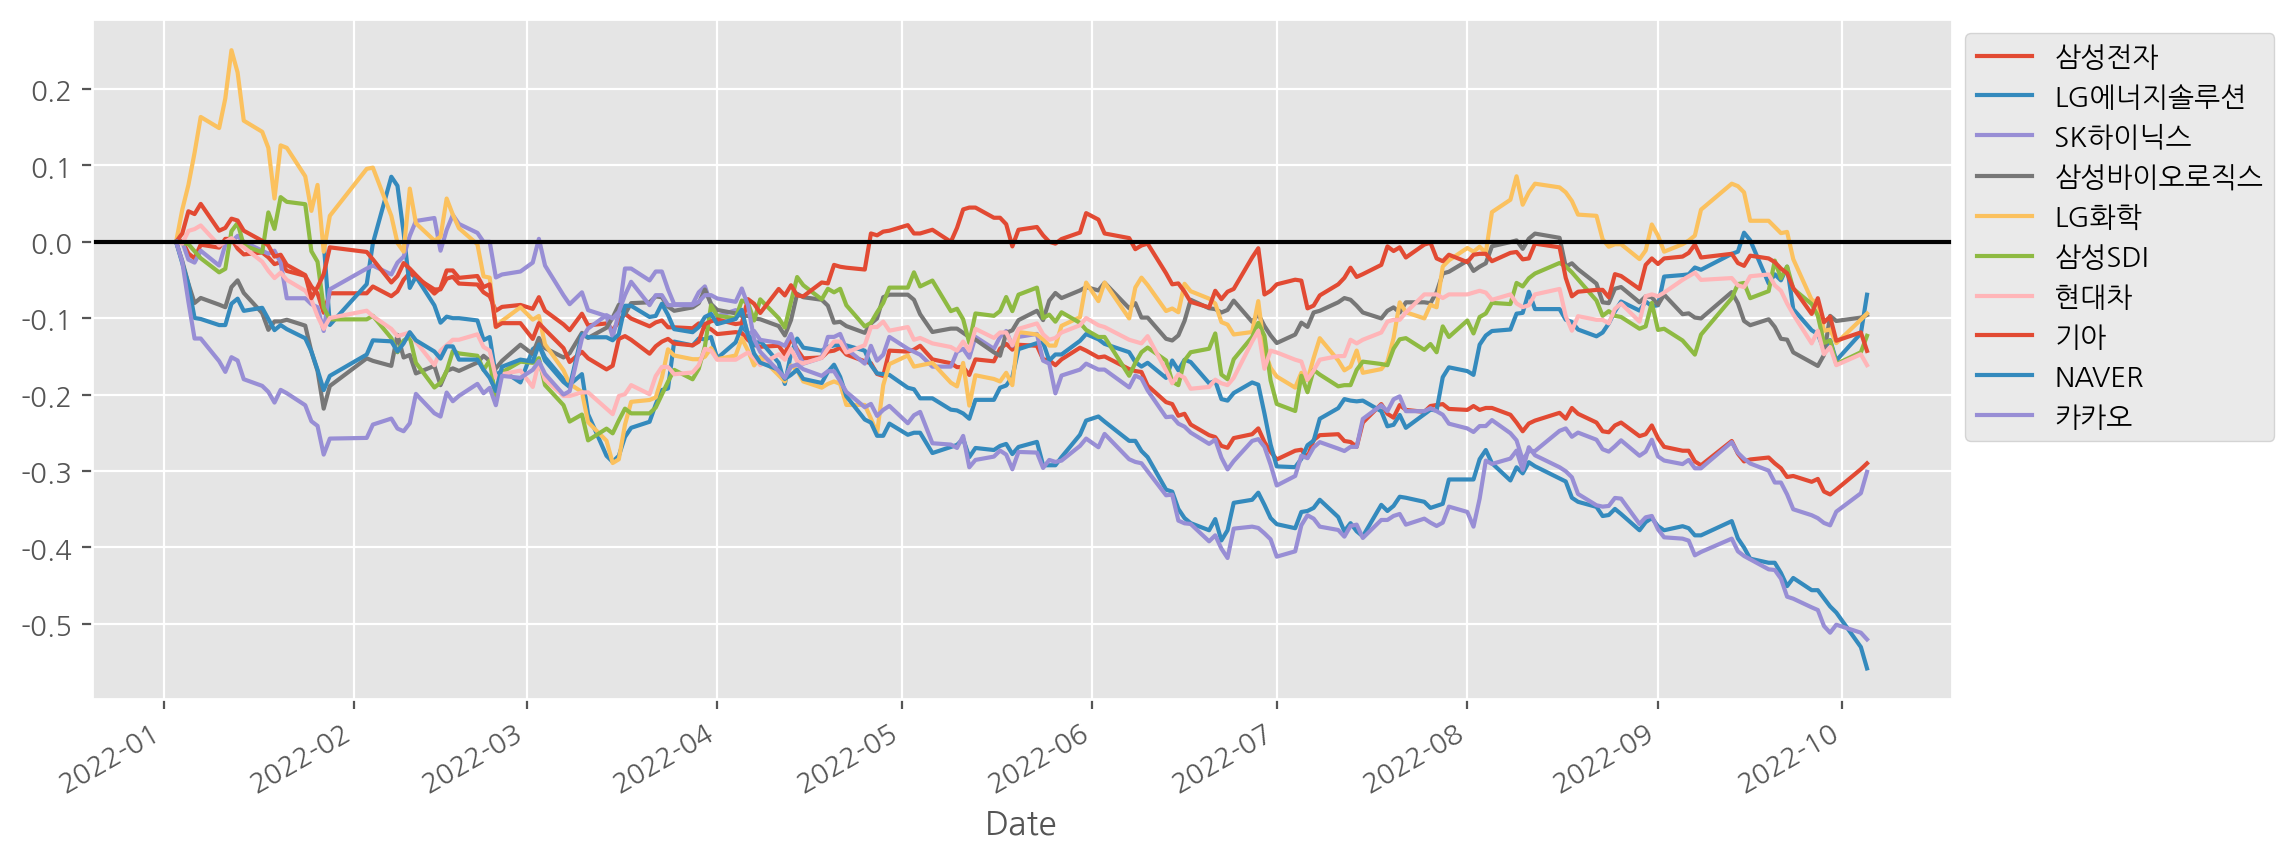

In [31]:
df_norm.plot(figsize=(12, 5))
plt.axhline(0, c="k")
plt.legend(bbox_to_anchor=(1, 1))

In [32]:
# 수익률 기술통계
df_norm.describe()

Name,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,삼성SDI,현대차,기아,NAVER,카카오
count,186.000000,168.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,-0.167084,-0.145733,-0.163884,-0.096212,-0.069732,-0.111505,-0.116939,-0.043037,-0.253124,-0.269338
std,0.087204,0.070750,0.107553,0.040343,0.108659,0.063379,0.051370,0.049568,0.116126,0.114922
min,-0.330789,-0.295050,-0.371206,-0.218441,-0.289644,-0.260000,-0.225653,-0.167070,-0.558511,-0.520524
25%,-0.240458,-0.192327,-0.260506,-0.119220,-0.159790,-0.156538,-0.153800,-0.070218,-0.349402,-0.367686
50%,-0.155852,-0.142574,-0.159533,-0.094784,-0.091424,-0.110769,-0.124703,-0.035714,-0.266622,-0.274236
75%,-0.105916,-0.106683,-0.073930,-0.075903,0.010518,-0.073846,-0.080760,-0.006356,-0.144282,-0.186681
max,0.003817,0.085149,0.035019,0.010732,0.250809,0.058462,0.021378,0.049637,0.000000,0.000000


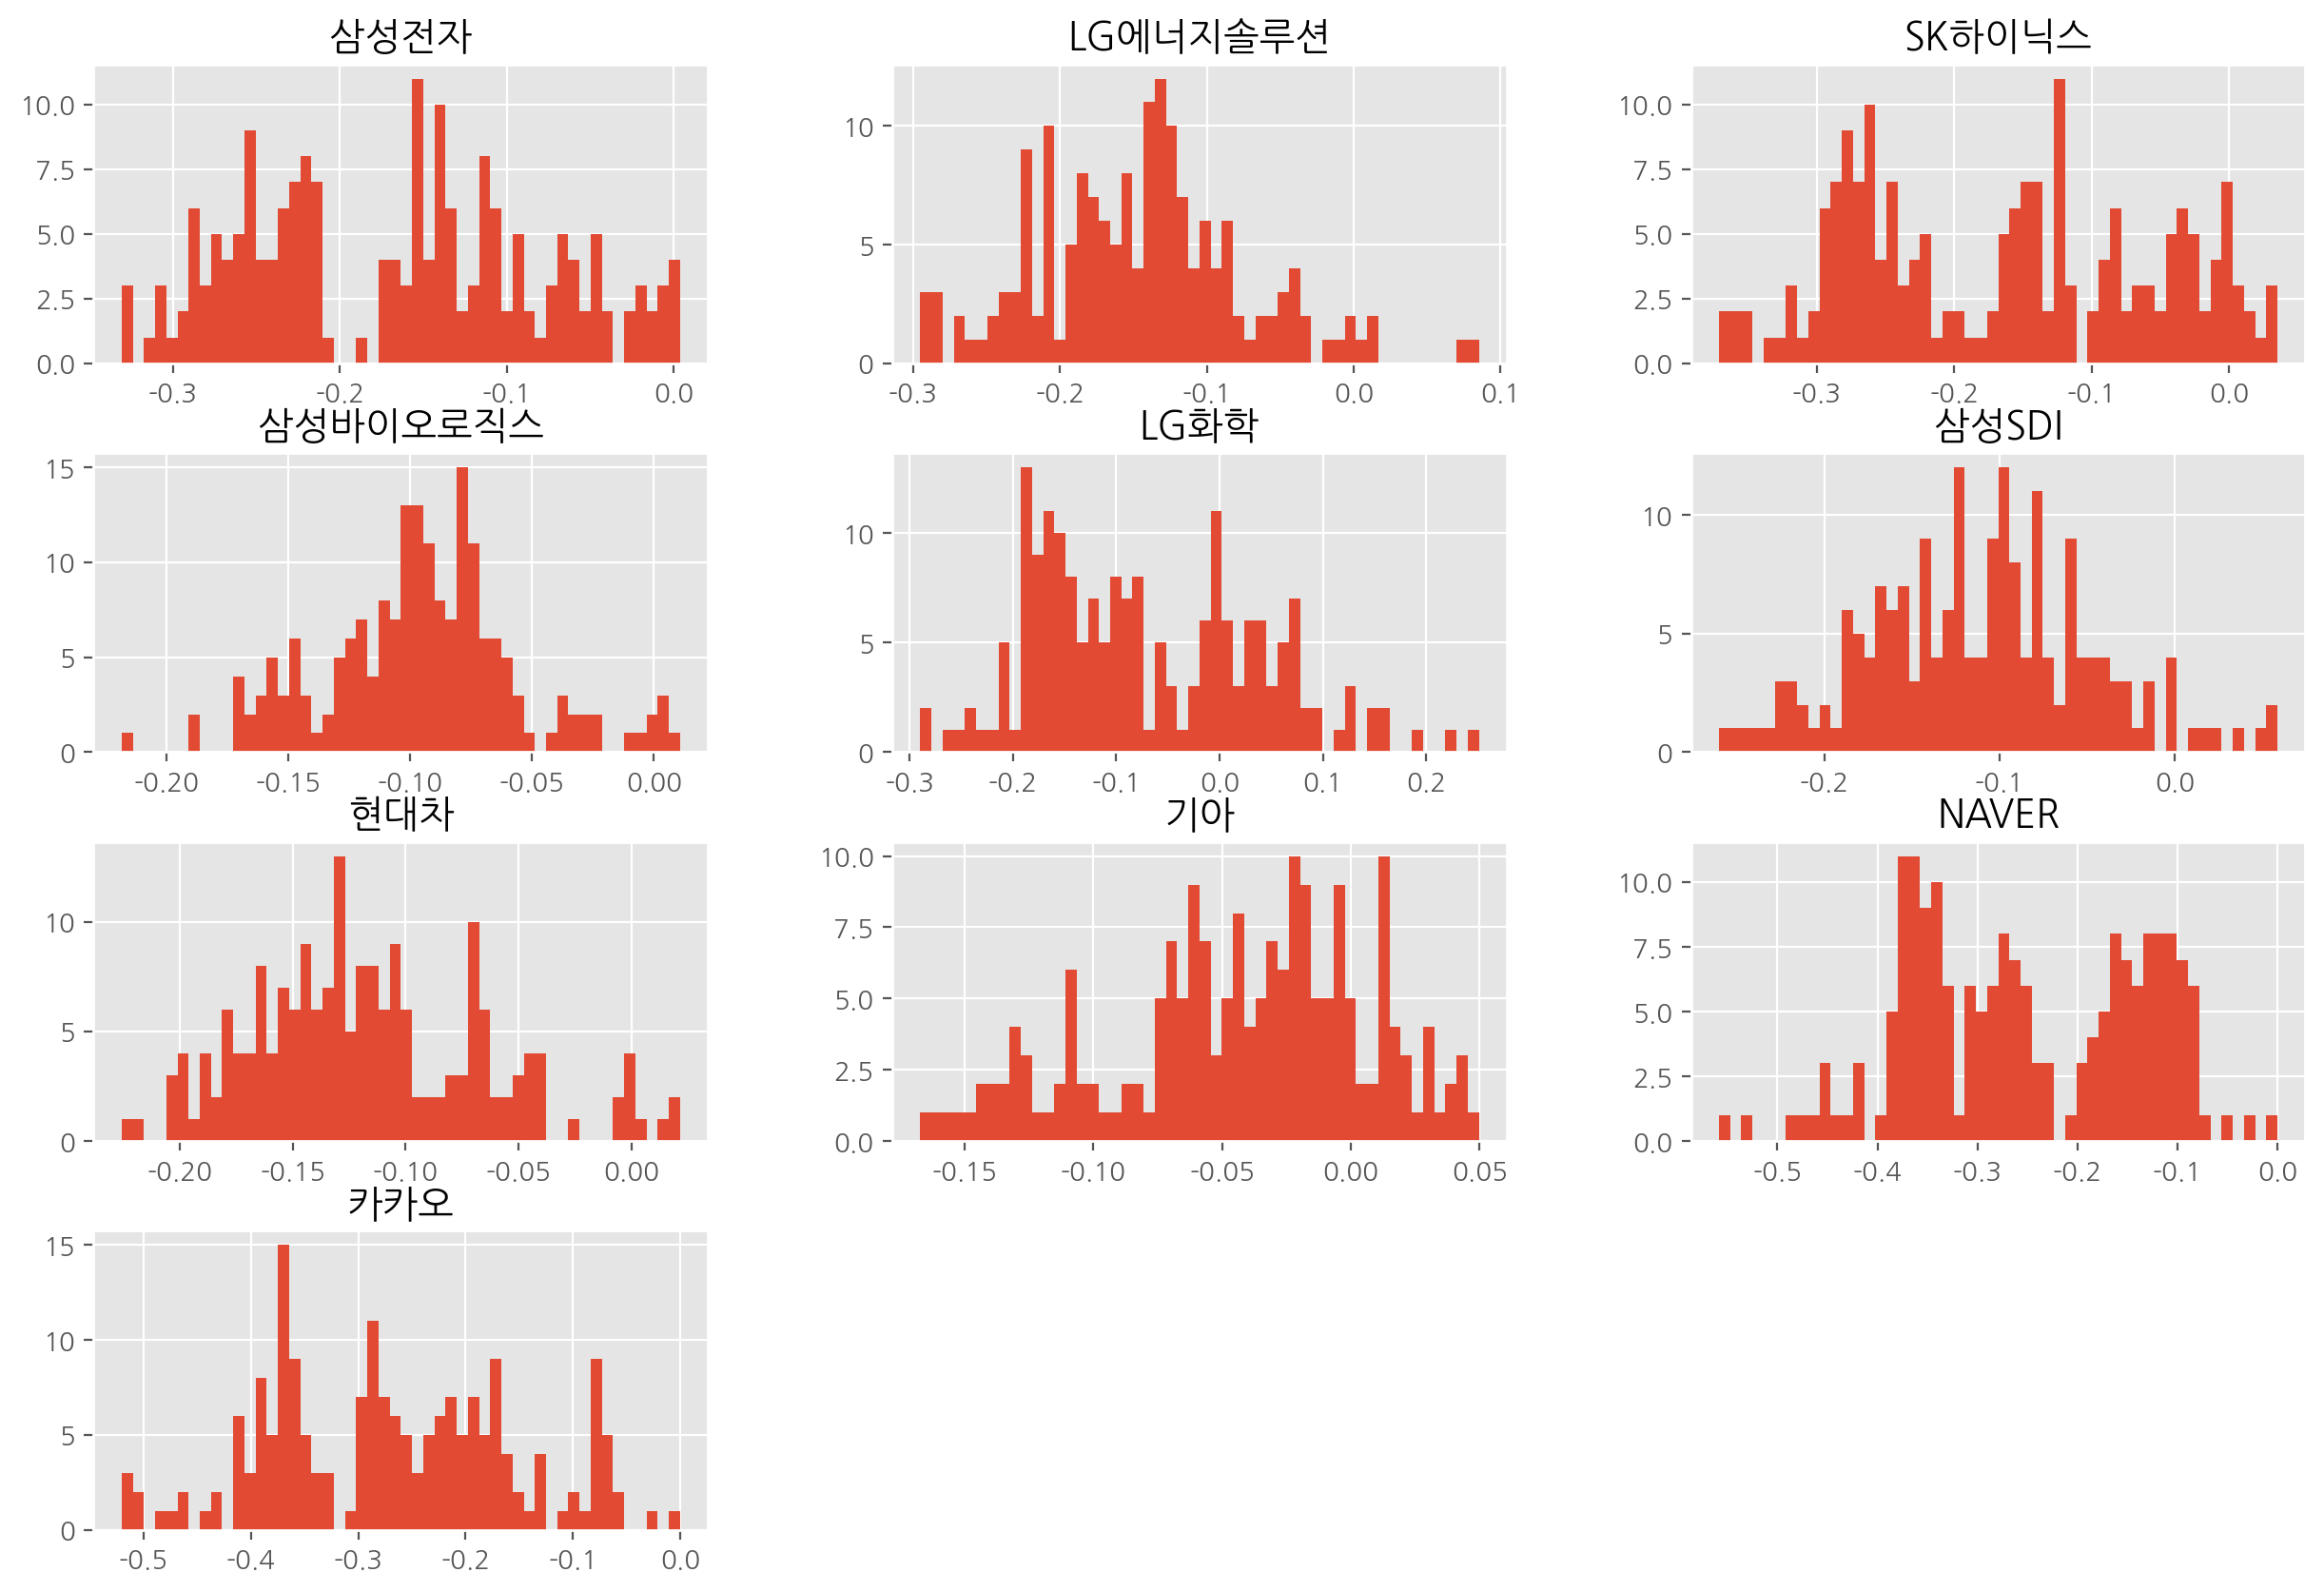

In [33]:
# 수익률 히스토그램
# 변수에 할당하면 로그 없이 깔끔하게 출력 됨 == plt.show()
# == df_norm.hist(bins=50, figsize=(15, 10));
_ = df_norm.hist(bins=50, figsize=(15, 10))

# 왜도와 첨도

In [34]:
# skew 로 수익률의 왜도
df_norm.skew().sort_values()

Name
기아         -0.470456
NAVER      -0.070326
SK하이닉스      0.085459
카카오         0.090694
삼성바이오로직스    0.092192
삼성전자        0.126310
삼성SDI       0.165120
LG에너지솔루션    0.401486
LG화학        0.453302
현대차         0.508539
dtype: float64

In [35]:
# kurt 로 수익률의 첨도
df_norm.kurt().sort_values()

Name
SK하이닉스     -1.177017
삼성전자       -1.022684
NAVER      -0.935933
카카오        -0.673910
LG화학       -0.456166
기아         -0.405283
삼성SDI      -0.069584
현대차        -0.046741
LG에너지솔루션    0.448338
삼성바이오로직스    0.519836
dtype: float64

In [36]:
# 날짜 "월"을 기준으로 정리
df_norm.resample("M").mean()

Name,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,삼성SDI,현대차,기아,NAVER,카카오
Date,,,,,,,,,,
2022-01-31,-0.026209,-0.054455,-0.032490,-0.096378,0.107929,-0.005231,-0.030641,-0.002724,-0.104122,-0.169258
2022-02-28,-0.062482,-0.075798,-0.007998,-0.157688,0.001528,-0.151197,-0.134072,-0.054210,-0.148271,-0.214508
2022-03-31,-0.104205,-0.191466,-0.062257,-0.101554,-0.184774,-0.198315,-0.183350,-0.133460,-0.119934,-0.106342
2022-04-30,-0.142554,-0.145073,-0.129702,-0.095419,-0.178918,-0.082051,-0.140595,-0.051885,-0.176355,-0.161530
2022-05-31,-0.149461,-0.179397,-0.147489,-0.101078,-0.151294,-0.086154,-0.123289,0.018275,-0.268237,-0.270701
2022-06-30,-0.222328,-0.176980,-0.236654,-0.095395,-0.088916,-0.149769,-0.155582,-0.039104,-0.324801,-0.346812
2022-07-31,-0.242397,-0.231495,-0.248879,-0.086375,-0.130760,-0.162271,-0.119896,-0.036550,-0.352837,-0.371720
2022-08-31,-0.233171,-0.107021,-0.258967,-0.035110,0.025669,-0.076923,-0.083027,-0.034834,-0.324468,-0.321675
2022-09-30,-0.292684,-0.061535,-0.313658,-0.109057,-0.009304,-0.092692,-0.078385,-0.044431,-0.417088,-0.434454


In [37]:
# 날짜 분기를 기준으로 정리
df_norm.resample("Q").mean()

Name,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,LG화학,삼성SDI,현대차,기아,NAVER,카카오
Date,,,,,,,,,,
2022-03-31,-0.065036,-0.134001,-0.035613,-0.116925,-0.028715,-0.118488,-0.116551,-0.064965,-0.123219,-0.160669
2022-06-30,-0.170627,-0.166991,-0.170227,-0.097328,-0.140529,-0.105285,-0.139568,-0.023998,-0.255362,-0.258276
2022-09-30,-0.255140,-0.134072,-0.272966,-0.075673,-0.037576,-0.110379,-0.093843,-0.038453,-0.363327,-0.374160
2022-12-31,-0.293893,-0.094554,-0.315175,-0.097561,-0.097896,-0.133846,-0.154394,-0.130751,-0.544548,-0.516157


In [39]:
df_norm["삼성전자"].resample("Q").agg(["mean", "median"])

,mean,median
Date,,
2022-03-31,-0.065036,-0.067430
2022-06-30,-0.170627,-0.153944
2022-09-30,-0.255140,-0.251908
2022-12-31,-0.293893,-0.293893
